# Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yaml
import math

%matplotlib inline

In [2]:
try:
    with open("../config2.yaml", "r") as file:
        config = yaml.safe_load(file)
except:
    print("The configuration file was not found!")

In [3]:
df_profile = pd.read_csv(config['data']['raw']['file1'])
df_digital1 = pd.read_csv(config['data']['raw']['file2'])
df_digital2 = pd.read_csv(config['data']['raw']['file3'])
df_experiment  = pd.read_csv(config['data']['raw']['file4'])

In [4]:
df_digital = pd.concat([df_digital1, df_digital2]).reset_index(drop = True)

In [5]:
print("Client Profiles:")
display(df_profile.head())
print("Digital Footprint:")
display(df_digital.head())
print("Experiment Roster:")
display(df_experiment.head())

Client Profiles:


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


Digital Footprint:


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


Experiment Roster:


,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


# Initial Exploration

### Client Profile dataset

In [6]:
#Explore the client profile dataset
df_profile.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [7]:
#Retrieving the number of rows and columns in the dataframe
print("The initial client profile dataframe has", df_profile.shape[0], 'rows and', df_profile.shape[1], 'columns')

The initial client profile dataframe has 70609 rows and 9 columns


In [8]:
# Displaying the data types of each column in the dataframe
df_profile.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [9]:
#Cleaning column names
clean_profile = df_profile.copy()
clean_profile = df_profile.rename(columns = lambda x: x.strip().lower())

clean_profile.columns = ['client_id', 'tenure_yr', 'tenure_mnth', 'age', 'gender', 'num_acc', 'balance', 'calls', 'log_ons']
clean_profile.head()

,client_id,tenure_yr,tenure_mnth,age,gender,num_acc,balance,calls,log_ons
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [10]:
#Using applymap() to convert all strings to lowercase
clean_profile = clean_profile.applymap(lambda x: x.lower() if isinstance(x, str) else x)
clean_profile

/var/folders/kz/yfq5dclx7cd6vx_pj9dj5d6m0000gn/T/ipykernel_80051/1702608284.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  clean_profile = clean_profile.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,client_id,tenure_yr,tenure_mnth,age,gender,num_acc,balance,calls,log_ons
0,836976,6.0,73.0,60.5,u,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,u,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,u,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,m,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,f,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,u,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,m,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,f,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,m,3.0,475114.69,4.0,4.0


In [11]:
#Grouping gender into either 'm', 'f', or 'na'
def map_gender(value):
    if value in ['u', 'x']:
        return 'na'
    else:
        return value

clean_profile['gender'] = clean_profile['gender'].apply(map_gender)
clean_profile['gender'].unique()

array(['na', 'm', 'f', nan], dtype=object)

In [12]:
#Checking for null values
print(clean_profile.isna().any())

client_id      False
tenure_yr       True
tenure_mnth     True
age             True
gender          True
num_acc         True
balance         True
calls           True
log_ons         True
dtype: bool


In [13]:
#Dropping rows with any missing values
clean_profile.dropna(inplace = True)
clean_profile.head()

,client_id,tenure_yr,tenure_mnth,age,gender,num_acc,balance,calls,log_ons
0,836976,6.0,73.0,60.5,na,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,na,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,na,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,m,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,f,2.0,103671.75,0.0,3.0


### Digital Footprint Dataset

In [14]:
#Explore the digital footprint dataset
df_digital.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [15]:
#Retrieving the number of rows and columns in the initial dataset
print("The initial digital footprint dataframe has", df_digital.shape[0], 'rows and', df_digital.shape[1], 'columns')

The initial digital footprint dataframe has 755405 rows and 5 columns


In [16]:
# Displaying the data types of each column in the dataframe
df_digital.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [17]:
#Checking for null values
df_digital.isna().any()

client_id       False
visitor_id      False
visit_id        False
process_step    False
date_time       False
dtype: bool

### Experiment Roster Dataset

In [18]:
#Explore the experiment roster dataset
df_experiment.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [70]:
#Cleaning column names
clean_experiment = df_experiment.copy()
clean_experiment = df_experiment.rename(columns = lambda x: x.strip().lower())

In [71]:
#Using applymap() to convert all strings to lowercase
clean_experiment = clean_experiment.applymap(lambda x: x.lower() if isinstance(x, str) else x)
clean_experiment

/var/folders/kz/yfq5dclx7cd6vx_pj9dj5d6m0000gn/T/ipykernel_80051/3840146764.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  clean_experiment = clean_experiment.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,client_id,variation
0,9988021,test
1,8320017,test
2,4033851,control
3,1982004,test
4,9294070,control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [72]:
#Grouping variation into either 'test', 'control', or 'unknown'
def map_variation(value):
    if value in ['test', 'control']:
        return value
    else:
        return 'unknown'

clean_experiment['variation'] = clean_experiment['variation'].apply(map_variation)
clean_experiment['variation'].unique()

array(['test', 'control', 'unknown'], dtype=object)

In [19]:
#Retrieving the number of rows and columns in the initial dataset
print("The initial experiment roster dataframe has", clean_experiment.shape[0], 'rows and', clean_experiment.shape[1], 'columns')

The initial experiment roster dataframe has 70609 rows and 2 columns


In [20]:
# Displaying the data types of each column in the dataframe
clean_experiment.dtypes

client_id     int64
Variation    object
dtype: object

In [21]:
#Checking for null values
clean_digital.isna().any()

client_id       False
visitor_id      False
visit_id        False
process_step    False
date_time       False
dtype: bool

# Univariate Analysis

In [22]:
#summary statistics of the dataset
clean_profile.describe()

,client_id,tenure_yr,tenure_mnth,age,num_acc,balance,calls,log_ons
count,7.059400e+04,70594.000000,70594.000000,70594.000000,70594.000000,7.059400e+04,70594.000000,70594.000000
mean,5.005026e+06,12.053007,150.659999,46.442240,2.255532,1.474467e+05,3.382469,5.566720
std,2.877289e+06,6.871850,82.090264,15.591273,0.535000,3.015106e+05,2.236595,2.353296
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519543e+06,6.000000,82.000000,32.500000,2.000000,3.734660e+04,1.000000,4.000000
50%,5.016974e+06,11.000000,136.000000,47.000000,2.000000,6.333459e+04,3.000000,5.000000
75%,7.483074e+06,16.000000,192.000000,59.000000,2.000000,1.375461e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [44]:
#primary_clients = pd.merge(clean_profile, df_digital, on = 'client_id', how = 'inner')
#primary_clients.head()

In [38]:
#Checking for null values
#primary_clients.isna().any()

In [45]:
# Creating a crosstab table for the 'gender' column, counting occurrences for each unique value
my_table = pd.crosstab(index = clean_profile["gender"],
                              columns="count")
my_table

col_0,count
gender,
f,22745
m,23724
na,24125


/var/folders/kz/yfq5dclx7cd6vx_pj9dj5d6m0000gn/T/ipykernel_80051/1338046654.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=my_table.index, y=my_table["count"], palette="Set3")


Text(0.5, 1.0, 'Gender Distribution of Primary Clients')

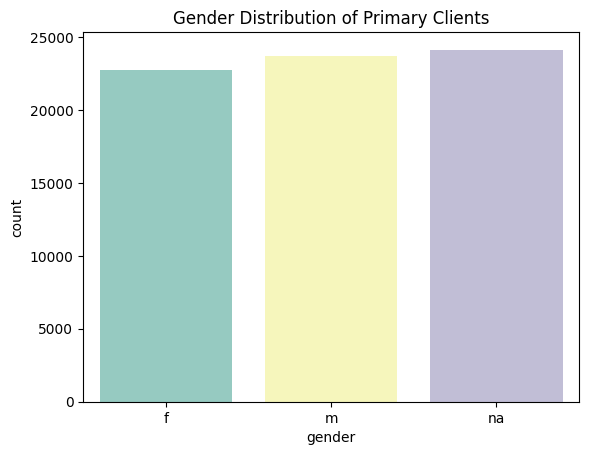

In [46]:
# Plotting a bar chart using the 'count' values from 'my_table'
sns.barplot(x=my_table.index, y=my_table["count"], palette="Set3")
plt.title("Gender Distribution of Primary Clients")

Text(0.5, 1.0, 'Age Distribution of Primary Clients')

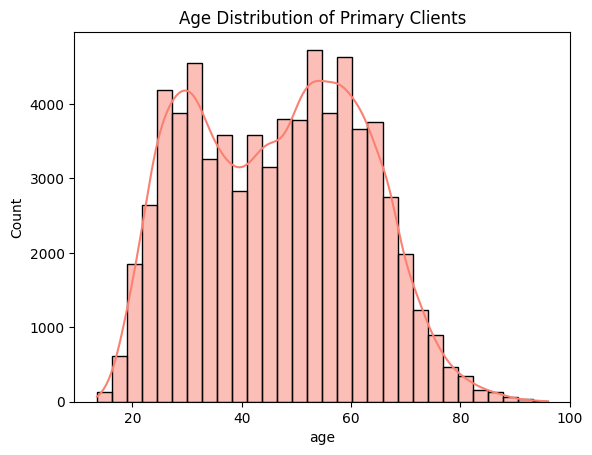

In [49]:
# Plotting a histogram for the 'age' column of the 'primary_clients' dataframe
sns.histplot(clean_profile['age'], kde=True, bins=30, color="salmon")
plt.title("Age Distribution of Primary Clients")

In [50]:
# Creating a crosstab table for the 'num_acc' column, counting occurrences for each unique value
account_freq = pd.crosstab(index = clean_profile["num_acc"], columns="count")
account_freq

col_0,count
num_acc,
1.0,2
2.0,55496
3.0,12529
4.0,2241
5.0,284
6.0,33
7.0,8
8.0,1


/var/folders/kz/yfq5dclx7cd6vx_pj9dj5d6m0000gn/T/ipykernel_80051/3555453933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=account_freq.index, y=account_freq["count"], palette="Set3")


Text(0.5, 1.0, 'Account Type Distribution of Primary Clients')

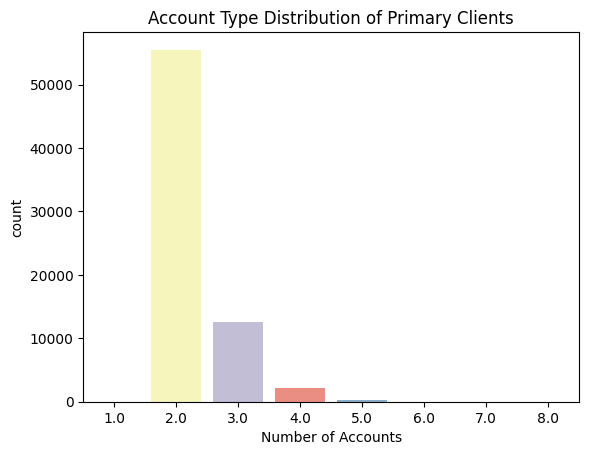

In [53]:
# Plotting a bar chart using the 'count' values from 'account_freq'
sns.barplot(x=account_freq.index, y=account_freq["count"], palette="Set3")
plt.xlabel("Number of Accounts")
plt.title("Account Type Distribution of Primary Clients")

Text(0.5, 1.0, 'Tenure Distribution of Primary Clients')

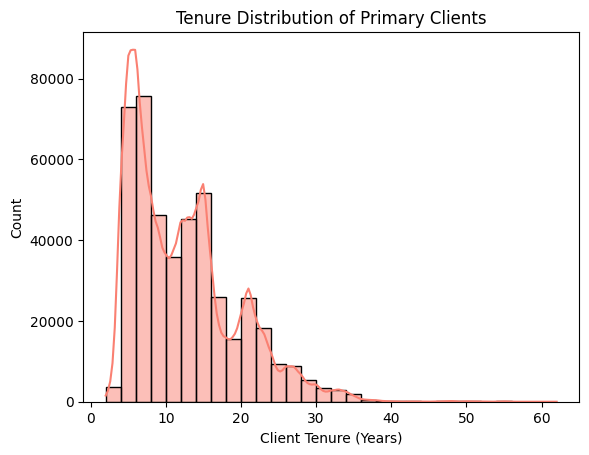

In [58]:
# Plotting a histogram of client tenure
sns.histplot(primary_clients['tenure_yr'], kde = True, bins = 30, color = 'salmon')
plt.xlabel("Client Tenure (Years)")
plt.title("Tenure Distribution of Primary Clients")

Text(0, 0.5, 'Tenure (years)')

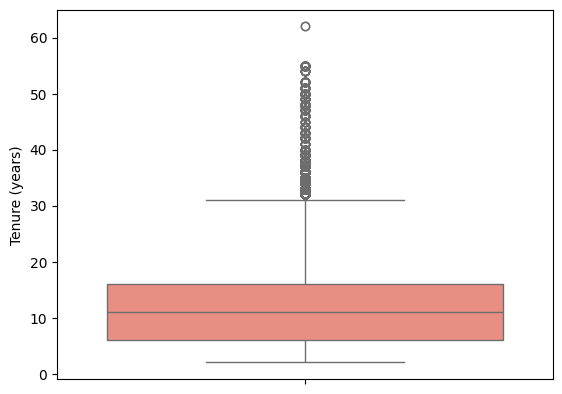

In [59]:
#Boxplot
sns.boxplot(data = primary_clients['tenure_yr'], color="salmon")
plt.ylabel("Tenure (years)")

In [60]:
clean_profile.head()

,client_id,tenure_yr,tenure_mnth,age,gender,num_acc,balance,calls,log_ons
0,836976,6.0,73.0,60.5,na,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,na,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,na,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,m,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,f,2.0,103671.75,0.0,3.0


In [65]:
#Mean age of primary clients
mean_age = clean_profile['age'].mean()
print(f"The mean age of primary clients is {mean_age:.1f} years old.")

#Mean tenure of primary clients
mean_tenure = clean_profile['tenure_yr'].mean()
print(f"The mean tenure of primary clients is {mean_tenure:.1f} years.")

#Mean accounts of primary clients
mean_accounts = clean_profile['num_acc'].mean()
print(f"The mean number of accounts held by primary clients is {mean_accounts:.1f}.")

#Mean calls of primary clients
mean_calls = clean_profile['calls'].mean()
print(f"The mean number of calls made in the last 6 months is {mean_calls:.1f} times.")

#Mean logons of primary clients
mean_logons = clean_profile['log_ons'].mean()
print(f"The mean number of log ons made in the last 6 months is {mean_logons:.1f} times.")

The mean age of primary clients is 46.4 years old.
The mean tenure of primary clients is 12.1 years.
The mean number of accounts held by primary clients is 2.3.
The mean number of calls made in the last 6 months is 3.4 times.
The mean number of log ons made in the last 6 months is 5.6 times.


In [75]:
# Creating a crosstab table for the 'variation' column, counting occurrences for each unique value
variation_freq = pd.crosstab(index = clean_experiment["variation"], columns="count")
variation_freq

col_0,count
variation,
control,23532
test,26968
unknown,20109


/var/folders/kz/yfq5dclx7cd6vx_pj9dj5d6m0000gn/T/ipykernel_80051/2556262292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=variation_freq.index, y=variation_freq["count"], palette="Set3")


Text(0.5, 1.0, 'Experimental Group Distribution of Primary Clients')

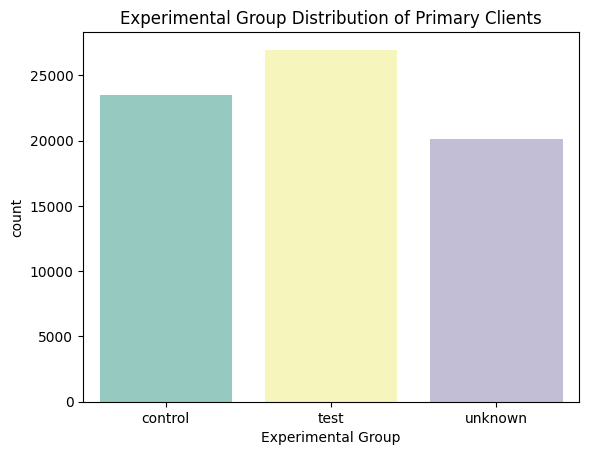

In [77]:
# Plotting a bar chart using the 'count' values from 'variation_freq'
sns.barplot(x=variation_freq.index, y=variation_freq["count"], palette="Set3")
plt.xlabel("Experimental Group")
plt.title("Experimental Group Distribution of Primary Clients")

# Bivariate Analysis

In [79]:
df_merged = pd.merge(clean_profile, clean_experiment, on = 'client_id', how = 'inner')
df_merged

,client_id,tenure_yr,tenure_mnth,age,gender,num_acc,balance,calls,log_ons,variation
0,836976,6.0,73.0,60.5,na,2.0,45105.30,6.0,9.0,test
1,2304905,7.0,94.0,58.0,na,2.0,110860.30,6.0,9.0,control
2,1439522,5.0,64.0,32.0,na,2.0,52467.79,6.0,9.0,test
3,1562045,16.0,198.0,49.0,m,2.0,67454.65,3.0,6.0,test
4,5126305,12.0,145.0,33.0,f,2.0,103671.75,0.0,3.0,control
...,...,...,...,...,...,...,...,...,...,...
70589,7993686,4.0,56.0,38.5,na,3.0,1411062.68,5.0,5.0,unknown
70590,8981690,12.0,148.0,31.0,m,2.0,101867.07,6.0,6.0,unknown
70591,333913,16.0,198.0,61.5,f,2.0,40745.00,3.0,3.0,unknown
70592,1573142,21.0,255.0,68.0,m,3.0,475114.69,4.0,4.0,unknown


In [80]:
# Generating a crosstab for 'gender' and 'variation'
crosstab_result = pd.crosstab(df_merged['gender'], df_merged['variation'])
crosstab_result

variation,control,test,unknown
gender,,,
f,7542,8716,6487
m,7970,8977,6777
na,8014,9268,6843


<Axes: xlabel='variation', ylabel='count'>

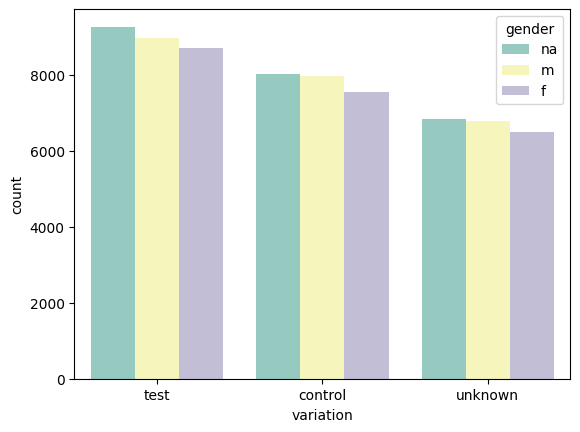

In [83]:
# Plotting a grouped bar chart
sns.countplot(data=df_merged, x='variation', hue='gender', palette="Set3")

In [92]:
from scipy.stats import chi2_contingency

# Chi-square test for 'gender' and 'variation'
chi2_statistic, p, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, p

alpha = 0.05
if p<0.05:
    print("Reject the null hypothesis. There is a significant association between the categorical variables.")
else:
    print("Accept the null hypothesis. There is not a significant association between the categorical variables.")

Accept the null hypothesis. There is not a significant association between the categorical variables.


In [90]:
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
cramer_v = association(crosstab_result, method="cramer")
cramer_v
print(f"A Cramér's V of {cramer_v:.4f} further indicates no significant association between 'gender' and 'variation'")

A Cramér's V of 0.0039 further indicates no significant association between 'gender' and 'variation'
